In [20]:
#Cogido do link: Bing Vídeos
#https://www.bing.com/videos/riverview/relatedvideo?q=aprenda+deep+learning+predi%c3%a7%c3%a3o+de+a%c3%a7%c3%b5es&mid=E0528AFB50F60C855987E0528AFB50F60C855987&FORM=VIRE


In [21]:
# Ajustar o pandas_datareader usando o yfinance
import yfinance
from datetime import datetime as dt
from pandas_datareader import data as pdr
yfinance.pdr_override()
acao = "WEGE3.SA"
inicio = "2018-12-05"
#final = "2023-12-05"
final = dt.today().strftime('%Y-%m-%d')
dados_acao = pdr.get_data_yahoo(acao, inicio, final)
dados_acao.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-05,9.080,9.080,8.885,8.925,8.306917,3045000
2018-12-06,8.885,8.960,8.825,8.915,8.297606,5643600
2018-12-07,8.955,9.010,8.815,8.845,8.232450,5918800
2018-12-10,8.870,8.945,8.605,8.605,8.009073,4977400
2018-12-11,8.720,8.745,8.595,8.700,8.097490,6163200


In [22]:
#Vamos trabalhar com dados de Fechamentgo (Close)

cotacao = dados_acao['Close'].to_numpy().reshape(-1, 1)

cotacao
len(cotacao)

1262

In [23]:
tamanho_dados_treinamento = int(len(cotacao) * 0.8)

tamanho_dados_treinamento

1009

In [24]:
#Escalar dados entre 0 e 1 e uma forma de Normalização, que  é uma técnica que visa colocar os dados
#em uma escala comum, sem distorcer as diferenças nos intervalos de valores.

from sklearn.preprocessing import MinMaxScaler 
import numpy as np

escalador = MinMaxScaler(feature_range=(0, 1))

dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])

dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento: , :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento))) + list(dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste)))
                                                

dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)

In [25]:
dados_para_treinamento = dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

#dados que serão usados para gerar o resultado
treinamento_x = []
#cotação que aconteceu de fato
treinamento_y = []


for i in range(60, len(dados_para_treinamento)):

    #O modelo usa os 60 ultimos dias para previsão
    treinamento_x.append(dados_para_treinamento[i - 60: i, 0])
    #cotacao
    treinamento_y.append(dados_para_treinamento[i, 0])

    if i <= 61:

        print(treinamento_x)
        print(treinamento_y)



[array([0.01353145, 0.01326612, 0.01140887, 0.00504111, 0.00756168,
       0.00623507, 0.00716372, 0.00689839, 0.00119395, 0.        ,
       0.00358186, 0.00557177, 0.00676572, 0.00225524, 0.00397983,
       0.00941896, 0.01525603, 0.02069514, 0.02348104, 0.01963385,
       0.01764394, 0.02029717, 0.02215442, 0.02467499, 0.02746086,
       0.02255241, 0.02772619, 0.02613424, 0.02480765, 0.02639957,
       0.02295038, 0.02573628, 0.02639957, 0.03037942, 0.03157335,
       0.03435925, 0.0266649 , 0.03714512, 0.03807377, 0.04271689,
       0.03329796, 0.03104272, 0.02878748, 0.0273282 , 0.02706289,
       0.024277  , 0.0266649 , 0.02746086, 0.02984877, 0.03396126,
       0.02600161, 0.02719553, 0.02945077, 0.02162376, 0.01989918,
       0.02321571, 0.02109313, 0.02003184, 0.02321571, 0.02241975])]
[0.02613424429937944]
[array([0.01353145, 0.01326612, 0.01140887, 0.00504111, 0.00756168,
       0.00623507, 0.00716372, 0.00689839, 0.00119395, 0.        ,
       0.00358186, 0.00557177, 0.006

In [26]:
#transformando as listas em arrays e dando reshape 3d 

treinamento_x, treinamento_y = np.array(treinamento_x), np.array(treinamento_y)

treinamento_x

treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)

treinamento_x

array([[[0.01353145],
        [0.01326612],
        [0.01140887],
        ...,
        [0.02003184],
        [0.02321571],
        [0.02241975]],

       [[0.01326612],
        [0.01140887],
        [0.00504111],
        ...,
        [0.02321571],
        [0.02241975],
        [0.02613424]],

       [[0.01140887],
        [0.00504111],
        [0.00756168],
        ...,
        [0.02241975],
        [0.02613424],
        [0.02852215]],

       ...,

       [[0.57641283],
        [0.62947731],
        [0.66768379],
        ...,
        [0.8098965 ],
        [0.79822235],
        [0.78999732]],

       [[0.62947731],
        [0.66768379],
        [0.65866283],
        ...,
        [0.79822235],
        [0.78999732],
        [0.78522151]],

       [[0.66768379],
        [0.65866283],
        [0.6700716 ],
        ...,
        [0.78999732],
        [0.78522151],
        [0.80352882]]])

In [27]:
#construindo o modelo

#importing te keras Libraries and Packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
modelo = Sequential()

#vamos criar um modelo com 50 neurônios
#return sequences = True pois vamos usar outro LSTM depois.
#definir o shape, que no caso são 60 informações para gerar uma.
#Adicionar mais neurônios com o dense, 25 e 1
#Não se apegue a isso agora, é apenas um arquitetura de deep learning.

modelo.add(LSTM(50, return_sequences=True, input_shape = (treinamento_x.shape[1], 1)))
modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))


In [28]:
# Copilando o modelo

# A função de loss é a forma de medir o erro do modelo, que nesse caso
# é o classico erro médio quadrático da que é usado em regressão linear
# otimizador e medida de erro

# ETA é a abreviação de “Estimated Time of Arrival”. 
# No treinamento LSTM, o ETA é uma estimativa do tempo restante para o término do treinamento

modelo.compile(optimizer="adam", loss="mean_squared_error") 

In [29]:
# Modelo compilado e dados preparados...
# agora podemos treinar o modelo

modelo.fit(treinamento_x, treinamento_y, batch_size=1, epochs=1)

949/949 [==============================] - 17s 16ms/step - loss: 0.0046


In [30]:
# Criar dados de teste

dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60:, :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento: , :] 

for i in range(60, len(dados_teste)):
    teste_x.append(dados_teste[i - 60: i, 0])
    

In [31]:
# Reshape
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [32]:
# Pegando predições do modelo

predicoes = modelo.predict(teste_x)

# Tirando a escala dos dados (voltando para valor nominal)

predicoes = escalador.inverse_transform(predicoes)

predicoes

8/8 [==============================] - 1s 9ms/step


array([[35.732925],
       [35.736088],
       [35.625473],
       [35.486267],
       [35.347683],
       [35.27081 ],
       [35.224934],
       [35.17119 ],
       [35.213245],
       [35.29277 ],
       [35.428974],
       [35.469757],
       [35.513824],
       [35.521538],
       [35.502247],
       [35.418003],
       [35.31089 ],
       [35.18576 ],
       [35.196007],
       [35.230484],
       [35.25497 ],
       [35.22403 ],
       [35.245003],
       [35.301044],
       [35.34132 ],
       [35.35962 ],
       [35.333733],
       [35.295006],
       [35.250385],
       [35.234844],
       [35.290447],
       [35.377224],
       [35.455547],
       [35.568512],
       [35.67804 ],
       [35.849583],
       [35.927177],
       [36.0246  ],
       [36.08311 ],
       [36.110413],
       [36.148037],
       [36.204395],
       [36.245407],
       [36.246826],
       [36.278603],
       [36.334423],
       [36.44837 ],
       [36.555008],
       [36.621243],
       [36.68098 ],


In [33]:
# Pegando o erro médio quadrático (RMSE)

rmse = np.sqrt(np.mean(predicoes - teste_y) ** 2)
rmse

2.5119577038429473

In [34]:
# Criando dados para o grafico do modelo

import pandas as pd

treinamento = dados_acao.iloc[:tamanho_dados_treinamento, :]
df_teste = pd.DataFrame({"Close": dados_acao['Close'].iloc[tamanho_dados_treinamento:],
                        "predicoes": predicoes.reshape(len(predicoes))})


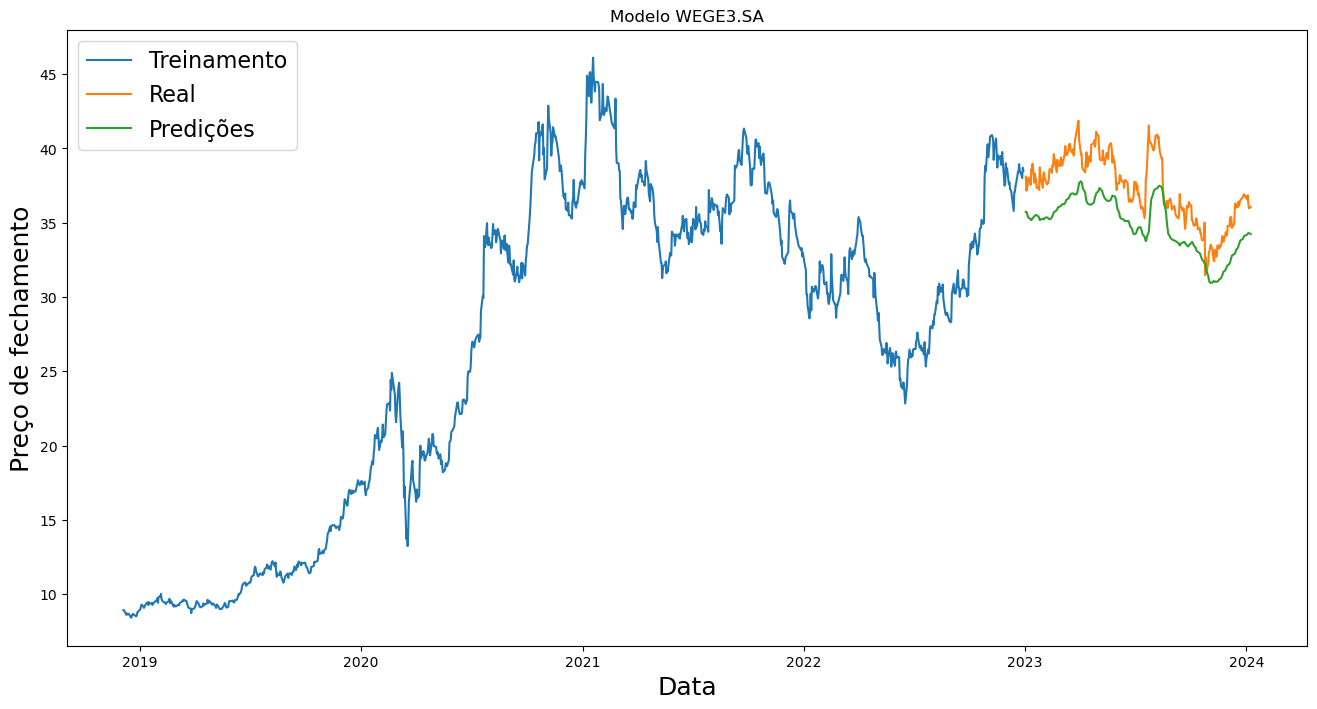

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize =(16, 8))
plt.title('Modelo ' + acao)
plt.xlabel('Data', fontsize = 18)
plt.ylabel("Preço de fechamento", fontsize = 18)
plt.plot(treinamento['Close'])
plt.plot(df_teste[['Close', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})
plt.show()

In [36]:
df_teste.sort_index()

df_teste

,Close,predicoes
Date,,
2023-01-02,38.099998,35.732925
2023-01-03,37.150002,35.736088
2023-01-04,37.400002,35.625473
2023-01-05,37.480000,35.486267
2023-01-06,38.029999,35.347683
...,...,...
2024-01-02,36.570000,34.198181
2024-01-03,36.849998,34.253288
2024-01-04,36.360001,34.304806


In [37]:
# O preço é importante, mais importante é acertar pra qual lado omercado vai. Sera q isso foi feito?

# Calcular media de acertos e expectativa de lucro

df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()

df_teste = df_teste.dropna()   # Remove valores nulos

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0, 
                                                      True, False)
df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0, 
                                                      True, False)

df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero'] == df_teste['var_modelo_maior_menor_que_zero']
                                      , True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste


C:\Users\User\AppData\Local\Temp\ipykernel_4080\2332306174.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0,
C:\Users\User\AppData\Local\Temp\ipykernel_4080\2332306174.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0,
C:\Users\User\AppData\Local\Temp\ipykernel_4080\2332306174.py:15: SettingWithCopyWarning: 
A v

,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
Date,,,,,,,,
2023-01-03,37.150002,35.736088,-0.024934,0.000088,False,True,False,0.024934
2023-01-04,37.400002,35.625473,0.006729,-0.003095,True,False,False,0.006729
2023-01-05,37.480000,35.486267,0.002139,-0.003908,True,False,False,0.002139
2023-01-06,38.029999,35.347683,0.014674,-0.003905,True,False,False,0.014674
2023-01-09,37.919998,35.270809,-0.002892,-0.002175,False,False,True,0.002892
...,...,...,...,...,...,...,...,...
2024-01-02,36.570000,34.198181,-0.009212,0.002842,False,True,False,0.009212
2024-01-03,36.849998,34.253288,0.007657,0.001611,True,True,True,0.007657
2024-01-04,36.360001,34.304806,-0.013297,0.001504,False,True,False,0.013297


In [38]:
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])
errou_lado = 1 - acertou_lado

media_lucro = df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()

exp_mat_lucro = acertou_lado * media_lucro[1] - media_lucro[0] * errou_lado

ganho_sobre_perda = media_lucro[1]/media_lucro[0]

print(media_lucro)
print(ganho_sobre_perda)
print(acertou_lado)
print(exp_mat_lucro * 100)

acertou_o_lado
False    0.011816
True     0.010114
Name: variacao_percentual_acao_abs, dtype: float64
0.8559684397224404
0.503968253968254
-0.07639184039131873


C:\Users\User\AppData\Local\Temp\ipykernel_4080\1543314228.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  exp_mat_lucro = acertou_lado * media_lucro[1] - media_lucro[0] * errou_lado
C:\Users\User\AppData\Local\Temp\ipykernel_4080\1543314228.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ganho_sobre_perda = media_lucro[1]/media_lucro[0]


In [39]:
#criando um código que você passa 60 dias e ele devolve a cotação
#resumindo: vamos descobrir o preço da petrobras de hoje/amanha com esse modelo

import datetime as dt

data_hoje = dt.datetime.now()
data_hoje = dt.datetime.today()

#se quiser escolher um dia, basta fazer assim
data_hoje = data_hoje -  dt.timedelta(days = 1)

if data_hoje.hour > 18:
    
    final = data_hoje
    inicial = datetime.now() - timedelta(days = 252)
    
else:
    final = data_hoje - timedelta(days = 1)
    inicial = datetime.now() - timedelta(days = 252)
    
#nao vai botar outra ação aqui hein kkkkkkkk
cotacoes = pdr.get_data_yahoo(acao, inicial, final) 
ultimos_60_dias = cotacoes['Close'].iloc[-60:].values.reshape(-1, 1)

ultimos_60_dias_escalado = escalador.transform(ultimos_60_dias)

teste_x = []
teste_x.append(ultimos_60_dias_escalado)
teste_x = np.array(teste_x)

teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

previsao_de_preco = modelo.predict(teste_x)
previsao_de_preco = escalador.inverse_transform(previsao_de_preco)

print(previsao_de_preco)


NameError: name 'timedelta' is not defined